<a href="https://colab.research.google.com/github/Mahrokh-Eb/Deep-Learning-with-Python/blob/main/plantSeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/plantSeed

/content/drive/MyDrive/plantSeed


In [3]:
!pip3 install bcolz

     |████████████████████████████████| 1.5MB 7.7MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp37-cp37m-linux_x86_64.whl size=2646200 sha256=33023332a5a7f3cd97680fc03907ce3c7de899384041ad6733cfcff2813f4c73
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

In [5]:
#pip install kaggle

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/plantSeed/drive"

In [7]:
%cd /content/drive/MyDrive/plantSeed/drive/

/content/drive/MyDrive/plantSeed/drive


In [8]:
pwd

'/content/drive/MyDrive/plantSeed/drive'

In [10]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.6MB 7.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 3.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=abc205f66365d4aae65af823af38cf96f009012e8e39adb05fe82e24688f59e5
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [12]:
!kaggle competitions download -c plant-seedlings-classification

429 - Too Many Requests


In [13]:
!ls

0021e90e4.png	   03a2ee656.png      0b3167af8.png.zip
003d61042.png	   03e322a29.png      0bef4ae08.png
006196e1c.png	   03ef36742.png      0c4a435c7.png
006a4d00d.png	   04098447d.png.zip  0ca928305.png
007b3da8b.png	   04142acb9.png      0cf0581b1.png
0086a6340.png	   043449b0b.png      0d5f555a3.png.zip
00b6eee9f.png	   0437393b1.png      0dba71eba.png
00ba5f88a.png	   04468fad4.png      0ddeaa6e7.png
00c47e980.png	   04526c399.png      0df5ee8a2.png
00d090cde.png	   04814f36d.png      0e1627696.png
00d33935c.png	   04b597a3f.png      0e51b1876.png
00dd0d16a.png	   04baa9ae6.png      0e93f4d05.png
00ef713a8.png	   04e064c46.png      0ec23ca76.png
0118f1f70.png	   04fafa0d3.png      0edcd02cd.png
01291174f.png	   051ea51d0.png      0f16cf10a.png
012db0f43.png	   05341a8a6.png      0f951d51e.png.zip
017a3000a.png	   0537577cd.png      0fa930fa9.png.zip
0184ec53f.png	   054a3e47e.png      0ff464e3e.png
019c3bbea.png	   05675900a.png      1022cc155.png
01a2ae45e.png	   0573b0ff7.png    

In [14]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/af45e222a.png      
  inflating: test/afa446484.png      
  inflating: test/afcf6abd5.png      
  inflating: test/b026bf8ca.png      
  inflating: test/b03397525.png      
  inflating: test/b0acaff4a.png      
  inflating: test/b130a0632.png      
  inflating: test/b145ba9d4.png      
  inflating: test/b1cd2a91e.png      
  inflating: test/b215531dd.png      
  inflating: test/b2706e2b3.png      
  inflating: test/b29339405.png      
  inflating: test/b30ab4659.png      
  inflating: test/b31292706.png      
  inflating: test/b341d0aab.png      
  inflating: test/b39c71707.png      
  inflating: test/b3d6fdb80.png      
  inflating: test/b3e08b037.png      
  inflating: test/b47691c08.png      
  inflating: test/b4c3df835.png      
  inflating: test/b4f7c9214.png      
  inflating: test/b573b7a56.png      
  inflating: test/b5c7fd009.png      
  inflating: test/b62dca166.png      
  inflating: test/b687160f5.png      

In [30]:

DATA_DIR ='/content/drive/MyDrive/plantSeed/drive/'

sz = 224
batch_size = 16

In [31]:
os.listdir(DATA_DIR)

['kaggle.json',
 '060450d79.png',
 '00d090cde.png',
 '03e322a29.png',
 '003d61042.png',
 '02cfeb38d.png',
 '03ef36742.png',
 '026716f9b.png',
 '043449b0b.png',
 '0437393b1.png',
 '03a2ee656.png',
 '007b3da8b.png',
 '00c47e980.png',
 '0086a6340.png',
 '03566743d.png',
 '05341a8a6.png',
 '01291174f.png',
 '0021e90e4.png',
 '00ef713a8.png',
 '04814f36d.png',
 '060f1dc84.png',
 '0975602f4.png',
 '1478bcfcd.png',
 '04468fad4.png',
 '0a4a26651.png',
 '096ec46ec.png',
 '106bfb13a.png',
 '0ec23ca76.png',
 '0df5ee8a2.png',
 '136134853.png',
 '143774101.png',
 '12e0ffb23.png',
 '108bf8703.png',
 '126c8b947.png',
 '01a2ae45e.png',
 '0382d0faf.png',
 '138581771.png',
 '060e8f499.png',
 '012db0f43.png',
 '11b88da7c.png',
 '0ff464e3e.png',
 '0e51b1876.png',
 '0cf0581b1.png',
 '04142acb9.png',
 '0c4a435c7.png',
 '0dba71eba.png',
 '09f038ce4.png',
 '0b2fba287.png',
 '0a7e1ca41.png',
 '0edcd02cd.png',
 '084a9cb18.png',
 '022179d65.png',
 '02c95e601.png',
 '0e1627696.png',
 '08fcc43a7.png',
 '0537577cd.

In [32]:
trn_dir = f'{DATA_DIR}train'
test_dir = f'{DATA_DIR}test'

In [33]:
trn_fnames = glob.glob(f'{DATA_DIR}/*/*')
trn_fnames[:5]

['/content/drive/MyDrive/plantSeed/drive/test/0021e90e4.png',
 '/content/drive/MyDrive/plantSeed/drive/test/003d61042.png',
 '/content/drive/MyDrive/plantSeed/drive/test/007b3da8b.png',
 '/content/drive/MyDrive/plantSeed/drive/test/0086a6340.png',
 '/content/drive/MyDrive/plantSeed/drive/test/00c47e980.png']

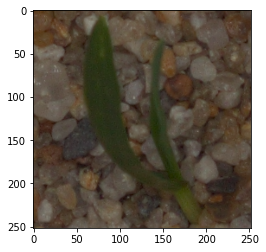

In [34]:
img = plt.imread(trn_fnames[715])
plt.imshow(img);

#Dataset

In [35]:
train_ds = datasets.ImageFolder(trn_dir)

In [36]:
train_ds.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [37]:
train_ds.class_to_idx

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [38]:
train_ds.root

'/content/drive/MyDrive/plantSeed/drive/train'

In [39]:
train_ds.imgs[:3]

[('/content/drive/MyDrive/plantSeed/drive/train/Black-grass/0050f38b3.png', 0),
 ('/content/drive/MyDrive/plantSeed/drive/train/Black-grass/0183fdf68.png', 0),
 ('/content/drive/MyDrive/plantSeed/drive/train/Black-grass/0260cffa8.png', 0)]

#Transforms

In [40]:
tfms = transforms.Compose([transforms.Resize((sz, sz)), 
                          transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.244, 0.225])
                          ])
train_ds = datasets.ImageFolder(trn_dir, tfms)
#valid_ds = datasets.ImageFolder(X_val, tfms)


#Dataloader

In [41]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


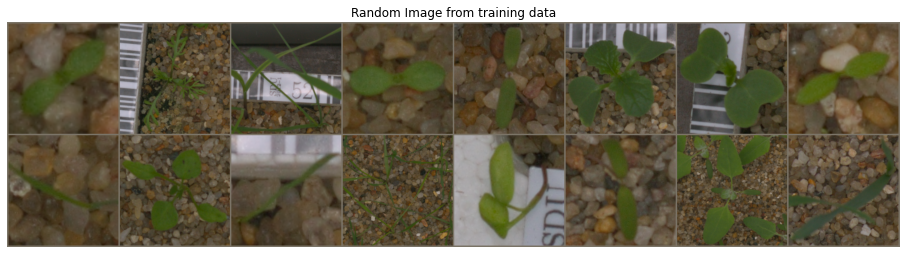

In [42]:
inputs, targets = next(iter(train_dl))
out = torchvision.utils.make_grid(inputs, padding=3)
plt.figure(figsize=(16,12))
imshow(out, title='Random Image from training data')